In [1]:
import os
import sys

from server.utils.audio import Audio

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/server")

2023-02-25 17:09:08.696826: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-25 17:09:08.784089: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-25 17:09:08.784103: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-25 17:09:09.326055: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

`Analiza dźwięku`

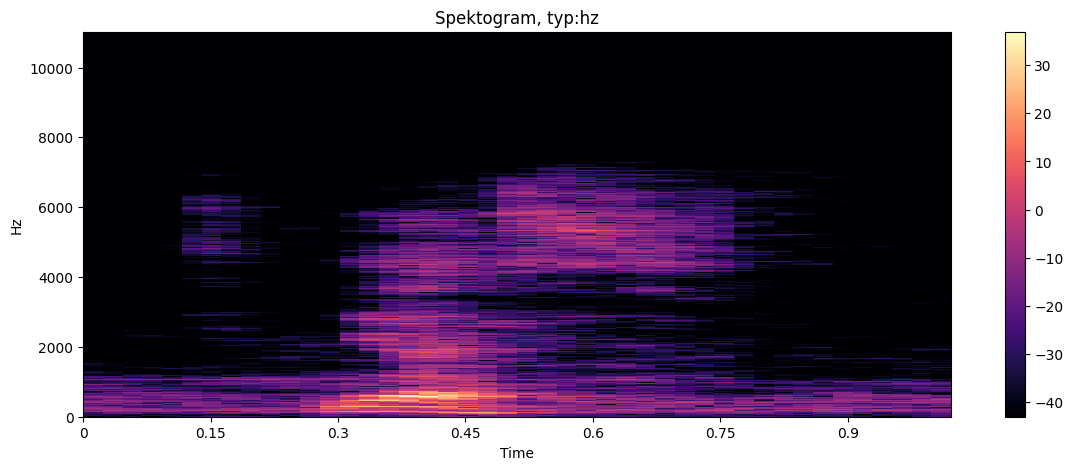

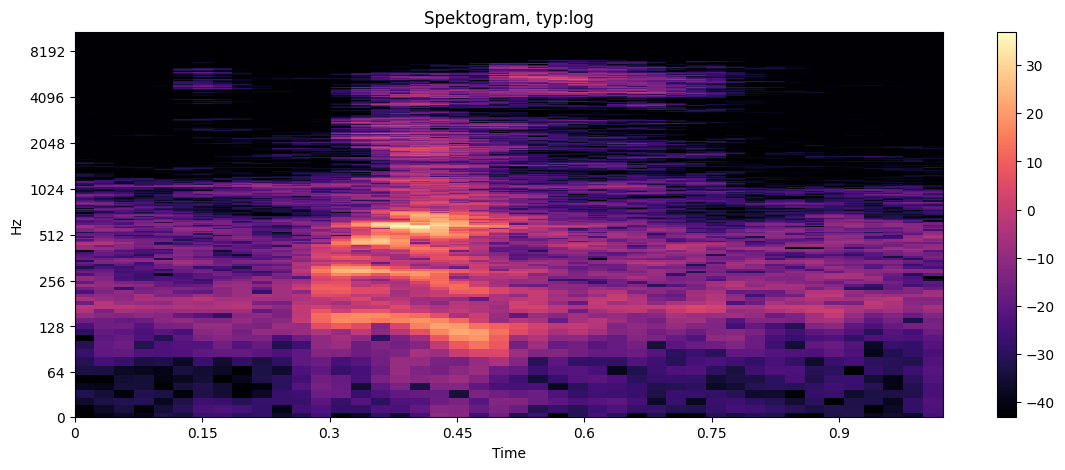

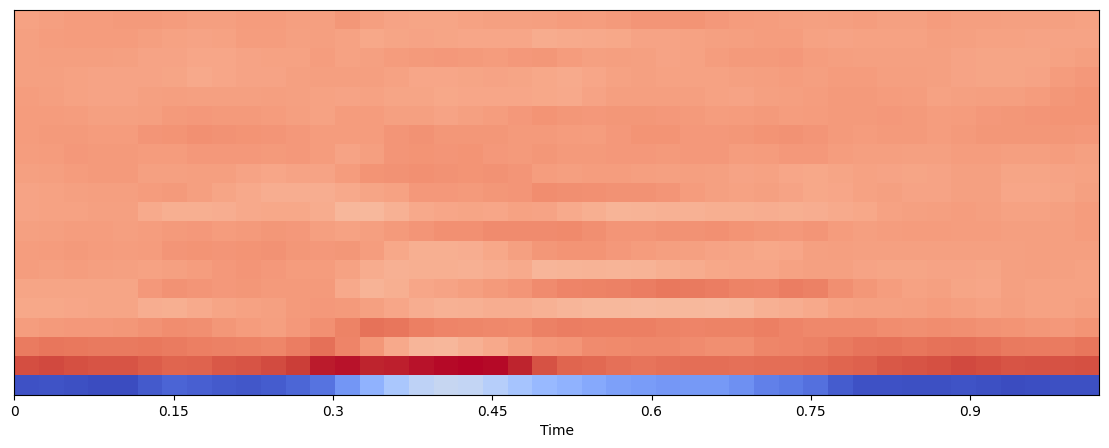

Testing


In [2]:
from server.utils.audio import Audio

audio = Audio('data/yes/0132a06d_nohash_2.wav')
audio.spectogram()
audio.spectogram(True)
audio.mfcc()
audio.test()

<!-- TODO -->
Text To Speech
`Text analytics`

In [3]:
from server.utils.audio import TextToSpeech
ts = TextToSpeech()
ts.example()


start_text:Called The Raymond Gosling. Franklin immediately spotted the flaws which concerned the water at polar latitudes are
edr
tokenized:['Called', 'The', 'Raymond', 'Gosling', '.', 'Franklin', 'immediately', 'spotted', 'the', 'flaws', 'which', 'concerned', 'the', 'water', 'at', 'polar', 'latitudes', 'are']
freq10:[('the', 2), ('Called', 1), ('The', 1), ('Raymond', 1), ('Gosling', 1), ('.', 1), ('Franklin', 1), ('immediately', 1), ('spotted', 1), ('flaws', 1)]
Dict['common_part', 'common_parta', 'common_partaa', 'common_partaaa', 'common_partaaaa', 'common_partaaaaa', 'common_partaaaaaa', 'common_partaaaaaaa', 'common_partaaaaaaaa', 'common_partaaaaaaaaa', 'common_partaaaaaaaaaa', 'common_partaaaaaaaaaaa', 'common_partaaaaaaaaaaaa', 'common_partaaaaaaaaaaaaa', 'common_partaaaaaaaaaaaaaa', 'common_partaaaaaaaaaaaaaaa', 'common_partaaaaaaaaaaaaaaaa', 'common_partaaaaaaaaaaaaaaaaa', 'common_partaaaaaaaaaaaaaaaaaa', 'common_partaaaaaaaaaaaaaaaaaaa', 'common_partaaaaaaaaaaaaaaaaaaaa', '

`Text To Speech`

bird
yes
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 7988, 8)           112       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2662, 8)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2662, 8)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2652, 16)          1424      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 884, 16)          0         
 1D)                                                

2023-02-25 17:10:13.628496: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 17:10:13.628678: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-25 17:10:13.628727: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-25 17:10:13.628768: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-25 17:10:13.628807: W tensorflow/c

Epoch 1/100
92/92 [==============================] - 6s 59ms/step - loss: 0.6423 - accuracy: 0.6553 - val_loss: 0.5389 - val_accuracy: 0.7527
Epoch 2/100
92/92 [==============================] - 5s 57ms/step - loss: 0.3862 - accuracy: 0.8447 - val_loss: 0.4707 - val_accuracy: 0.8043
Epoch 3/100
92/92 [==============================] - 5s 57ms/step - loss: 0.3066 - accuracy: 0.8766 - val_loss: 0.3718 - val_accuracy: 0.8696
Epoch 4/100
92/92 [==============================] - 5s 57ms/step - loss: 0.2624 - accuracy: 0.9041 - val_loss: 0.3435 - val_accuracy: 0.8804
Epoch 5/100
92/92 [==============================] - 5s 57ms/step - loss: 0.2357 - accuracy: 0.9103 - val_loss: 0.2768 - val_accuracy: 0.9035
Epoch 6/100
92/92 [==============================] - 5s 57ms/step - loss: 0.2073 - accuracy: 0.9252 - val_loss: 0.2212 - val_accuracy: 0.9253
Epoch 7/100
92/92 [==============================] - 5s 57ms/step - loss: 0.1984 - accuracy: 0.9330 - val_loss: 0.2428 - val_accuracy: 0.9117
Epoch 

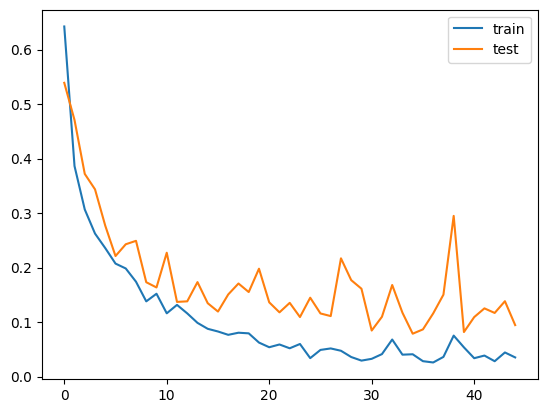

In [4]:
from server.utils.audio import SpeechToText
st = SpeechToText('data', 'trained.hdf5')
st.train()


`Predicted based on trained model`


In [5]:
import os

from server.utils.audio import SpeechToText

f = os.listdir('./data/bird/')
for a in f:
    a = SpeechToText.predict(f'./data/bird/{a}')
    print(a)



1/1 [==============================] - 0s 106ms/step
Index    
0
('bird', 0)
()
1/1 [==============================] - 0s 73ms/step
Index    
0
('bird', 0)
1/1 [==============================] - 0s 80ms/step
Index    
0
('bird', 0)
1/1 [==============================] - 0s 75ms/step
Index    
0
('bird', 0)
1/1 [==============================] - 0s 85ms/step
Index    
0
('bird', 0)
1/1 [==============================] - 0s 77ms/step
Index    
0
('bird', 0)
1/1 [==============================] - 0s 78ms/step
Index    
0
('bird', 0)
1/1 [==============================] - 0s 75ms/step
Index    
0
('bird', 0)
1/1 [==============================] - 0s 77ms/step
Index    
0
('bird', 0)
1/1 [==============================] - 0s 73ms/step
Index    
0
('bird', 0)
1/1 [==============================] - 0s 80ms/step
Index    
0
('bird', 0)
()
1/1 [==============================] - 0s 73ms/step
Index    
0
('bird', 0)
1/1 [==============================] - 0s 72ms/step
Index    
0
('bird', 0)
1/1 [

KeyboardInterrupt: 

In [6]:
import os

from server.utils.audio import SpeechToText

f = os.listdir('./data/yes/')
for a in f:
    a = SpeechToText.predict(f'./data/yes/{a}')
    print(a)

1/1 [==============================] - 0s 95ms/step
Index    
1
('yes', 1)
1/1 [==============================] - 0s 102ms/step
Index    
1
('yes', 1)
1/1 [==============================] - 0s 98ms/step
Index    
1
('yes', 1)
1/1 [==============================] - 0s 91ms/step
Index    
1
('yes', 1)
1/1 [==============================] - 0s 89ms/step
Index    
1
('yes', 1)
1/1 [==============================] - 0s 90ms/step
Index    
1
('yes', 1)
1/1 [==============================] - 0s 92ms/step
Index    
1
('yes', 1)
1/1 [==============================] - 0s 93ms/step
Index    
1
('yes', 1)
1/1 [==============================] - 0s 87ms/step
Index    
1
('yes', 1)
1/1 [==============================] - 0s 98ms/step
Index    
1
('yes', 1)
1/1 [==============================] - 0s 84ms/step
Index    
1
('yes', 1)
1/1 [==============================] - 0s 84ms/step
Index    
1
('yes', 1)
1/1 [==============================] - 0s 84ms/step
Index    
1
('yes', 1)
1/1 [===================